# data

In [ ]:
!pip install wfdb

In [ ]:
import os
import ast
import wfdb

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow.keras as keras

sns.set_style('darkgrid')

In [ ]:
!kaggle datasets download -d khyeh0719/ptb-xl-dataset

Dataset URL: https://www.kaggle.com/datasets/khyeh0719/ptb-xl-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
ptb-xl-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
import os

zip_file_path = '/content/ptb-xl-dataset.zip'
extract_path = '/kaggle/working/ptb-xl-dataset/'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [ ]:
PATH_TO_DATA = '/kaggle/working/ptb-xl-dataset/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.1/'

ECG_df = pd.read_csv(os.path.join(PATH_TO_DATA, 'ptbxl_database.csv'), index_col='ecg_id')
ECG_df.scp_codes = ECG_df.scp_codes.apply(lambda x: ast.literal_eval(x))
ECG_df.patient_id = ECG_df.patient_id.astype(int)
ECG_df.nurse = ECG_df.nurse.astype('Int64')
ECG_df.site = ECG_df.site.astype('Int64')
ECG_df.validated_by = ECG_df.validated_by.astype('Int64')

SCP_df = pd.read_csv(os.path.join(PATH_TO_DATA, 'scp_statements.csv'), index_col=0)
SCP_df = SCP_df[SCP_df.diagnostic == 1]

ECG_df

,patient_id,age,sex,height,weight,nurse,site,device,recording_date,report,...,validated_by_human,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr
ecg_id,,,,,,,,,,,,,,,,,,,,,
1,15709,56.0,1,NaN,63.0,2,0,CS-12 E,1984-11-09 09:17:34,sinusrhythmus periphere niederspannung,...,True,NaN,", I-V1,",NaN,NaN,NaN,NaN,3,records100/00000/00001_lr,records500/00000/00001_hr
2,13243,19.0,0,NaN,70.0,2,0,CS-12 E,1984-11-14 12:55:37,sinusbradykardie sonst normales ekg,...,True,NaN,NaN,NaN,NaN,NaN,NaN,2,records100/00000/00002_lr,records500/00000/00002_hr
3,20372,37.0,1,NaN,69.0,2,0,CS-12 E,1984-11-15 12:49:10,sinusrhythmus normales ekg,...,True,NaN,NaN,NaN,NaN,NaN,NaN,5,records100/00000/00003_lr,records500/00000/00003_hr
4,17014,24.0,0,NaN,82.0,2,0,CS-12 E,1984-11-15 13:44:57,sinusrhythmus normales ekg,...,True,", II,III,AVF",NaN,NaN,NaN,NaN,NaN,3,records100/00000/00004_lr,records500/00000/00004_hr
5,17448,19.0,1,NaN,70.0,2,0,CS-12 E,1984-11-17 10:43:15,sinusrhythmus normales ekg,...,True,", III,AVR,AVF",NaN,NaN,NaN,NaN,NaN,4,records100/00000/00005_lr,records500/00000/00005_hr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21833,17180,67.0,1,NaN,NaN,1,2,AT-60 3,2001-05-31 09:14:35,ventrikulÄre extrasystole(n) sinustachykardie ...,...,True,NaN,", alles,",NaN,NaN,1ES,NaN,7,records100/21000/21833_lr,records500/21000/21833_hr
21834,20703,93.0,0,NaN,NaN,1,2,AT-60 3,2001-06-05 11:33:39,sinusrhythmus lagetyp normal qrs(t) abnorm ...,...,True,NaN,NaN,NaN,NaN,NaN,NaN,4,records100/21000/21834_lr,records500/21000/21834_hr
21835,19311,59.0,1,NaN,NaN,1,2,AT-60 3,2001-06-08 10:30:27,sinusrhythmus lagetyp normal t abnorm in anter...,...,True,NaN,", I-AVR,",NaN,NaN,NaN,NaN,2,records100/21000/21835_lr,records500/21000/21835_hr


In [ ]:
ECG_df = ECG_df[(ECG_df['age'] >= 10) & (ECG_df['age'] < 40)].reset_index(drop=True)
ECG_df

,patient_id,age,sex,height,weight,nurse,site,device,recording_date,report,...,validated_by_human,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr
0,13243,19.0,0,NaN,70.0,2,0,CS-12 E,1984-11-14 12:55:37,sinusbradykardie sonst normales ekg,...,True,NaN,NaN,NaN,NaN,NaN,NaN,2,records100/00000/00002_lr,records500/00000/00002_hr
1,20372,37.0,1,NaN,69.0,2,0,CS-12 E,1984-11-15 12:49:10,sinusrhythmus normales ekg,...,True,NaN,NaN,NaN,NaN,NaN,NaN,5,records100/00000/00003_lr,records500/00000/00003_hr
2,17014,24.0,0,NaN,82.0,2,0,CS-12 E,1984-11-15 13:44:57,sinusrhythmus normales ekg,...,True,", II,III,AVF",NaN,NaN,NaN,NaN,NaN,3,records100/00000/00004_lr,records500/00000/00004_hr
3,17448,19.0,1,NaN,70.0,2,0,CS-12 E,1984-11-17 10:43:15,sinusrhythmus normales ekg,...,True,", III,AVR,AVF",NaN,NaN,NaN,NaN,NaN,4,records100/00000/00005_lr,records500/00000/00005_hr
4,19005,18.0,1,NaN,58.0,2,0,CS-12 E,1984-11-28 13:32:13,sinusrhythmus normales ekg,...,True,", V1",NaN,NaN,NaN,NaN,NaN,4,records100/00000/00006_lr,records500/00000/00006_hr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2830,20990,37.0,1,NaN,NaN,0,0,CS100 3,2001-01-20 15:49:14,sinusrhythmus lagetyp normal normales ekg 4.46...,...,False,NaN,", I-AVF,",NaN,NaN,NaN,NaN,2,records100/21000/21744_lr,records500/21000/21744_hr
2831,11171,28.0,0,NaN,NaN,0,0,CS100 3,2001-01-23 10:30:00,sinusrhythmus lagetyp normal normales ekg 4.46...,...,False,NaN,NaN,NaN,NaN,NaN,NaN,4,records100/21000/21758_lr,records500/21000/21758_hr
2832,16077,22.0,1,NaN,NaN,0,0,CS100 3,2001-01-27 11:43:56,sinus arrhythmie lagetyp normal unspezifisches...,...,False,NaN,NaN,NaN,NaN,NaN,NaN,4,records100/21000/21770_lr,records500/21000/21770_hr
2833,17583,35.0,1,NaN,NaN,0,0,CS100 3,2001-01-29 14:09:14,"sinusrhythmus linkstyp st & t abnorm, wahrsche...",...,False,NaN,", I-AVR,",NaN,NaN,NaN,NaN,4,records100/21000/21787_lr,records500/21000/21787_hr


In [ ]:
ECG_df.strat_fold.value_counts()

,count
strat_fold,
5,285
7,285
4,284
9,284
6,284
1,284
3,283
10,283
8,282


In [ ]:
def diagnostic_class(scp):
    res = set()
    for k in scp.keys():
        if k in SCP_df.index:
            res.add(SCP_df.loc[k].diagnostic_class)
    return list(res)

ECG_df['scp_classes'] = ECG_df.scp_codes.apply(diagnostic_class)

In [ ]:
def load_raw_data(df, sampling_rate, path):
    if sampling_rate == 100:
        data = [wfdb.rdsamp(os.path.join(path, f)) for f in df.filename_lr]
    else:
        data = [wfdb.rdsamp(os.path.join(path, f)) for f in df.filename_hr]
    data = np.array([signal for signal, meta in data])
    return data

sampling_rate = 100

ECG_data = load_raw_data(ECG_df, sampling_rate, PATH_TO_DATA)

ECG_data.shape

(2835, 1000, 12)

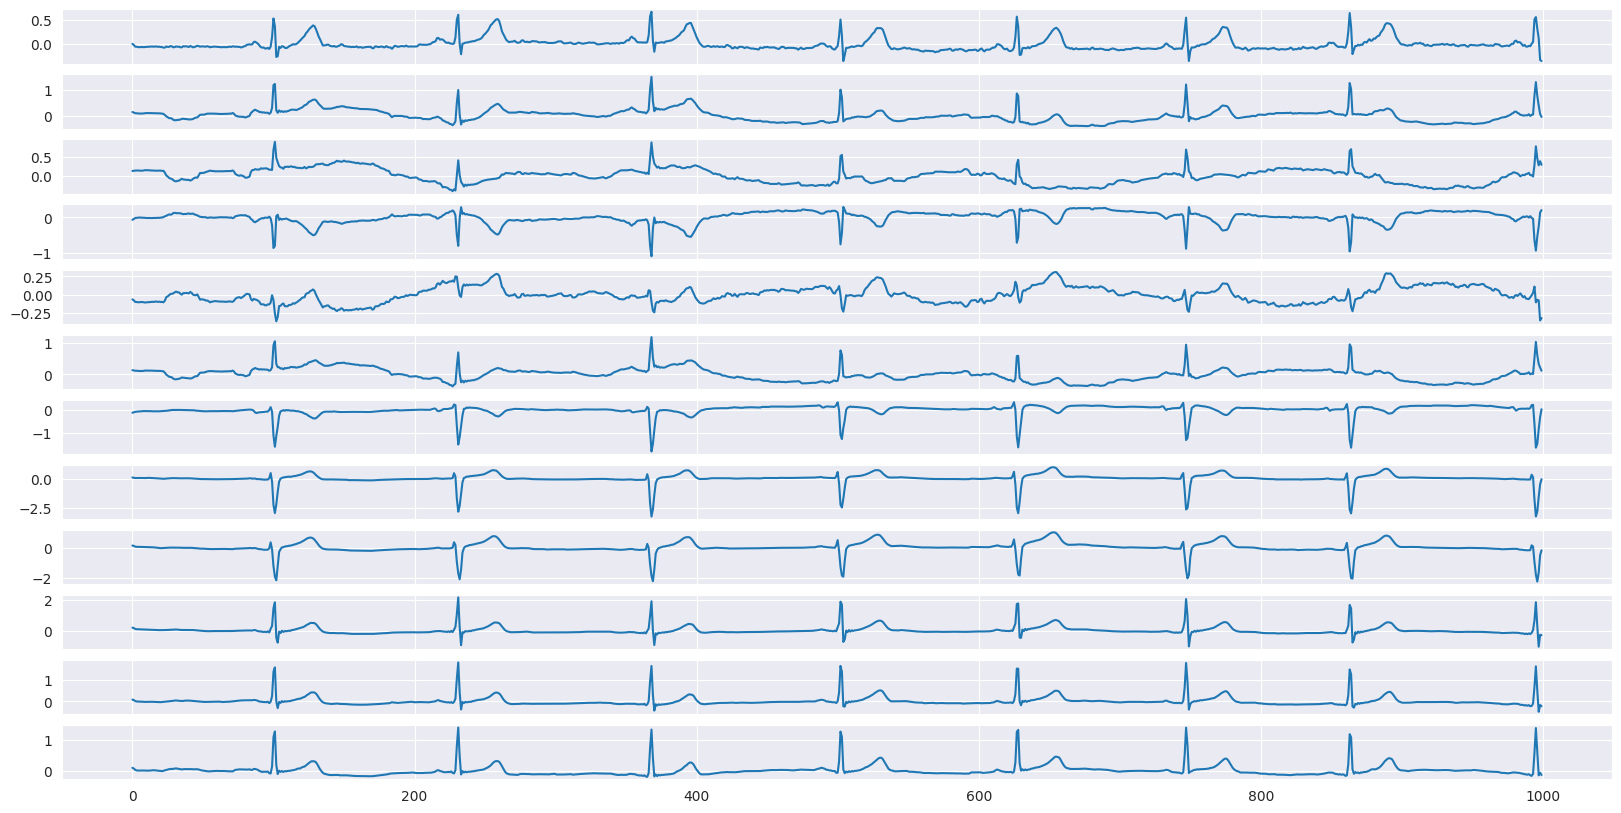

In [ ]:
sample = ECG_data[0]
bar, axes = plt.subplots(sample.shape[1], 1, figsize=(20,10))
for i in range(sample.shape[1]):
    sns.lineplot(x=np.arange(sample.shape[0]), y=sample[:, i], ax=axes[i])
# plt.tight_layout()
plt.show()

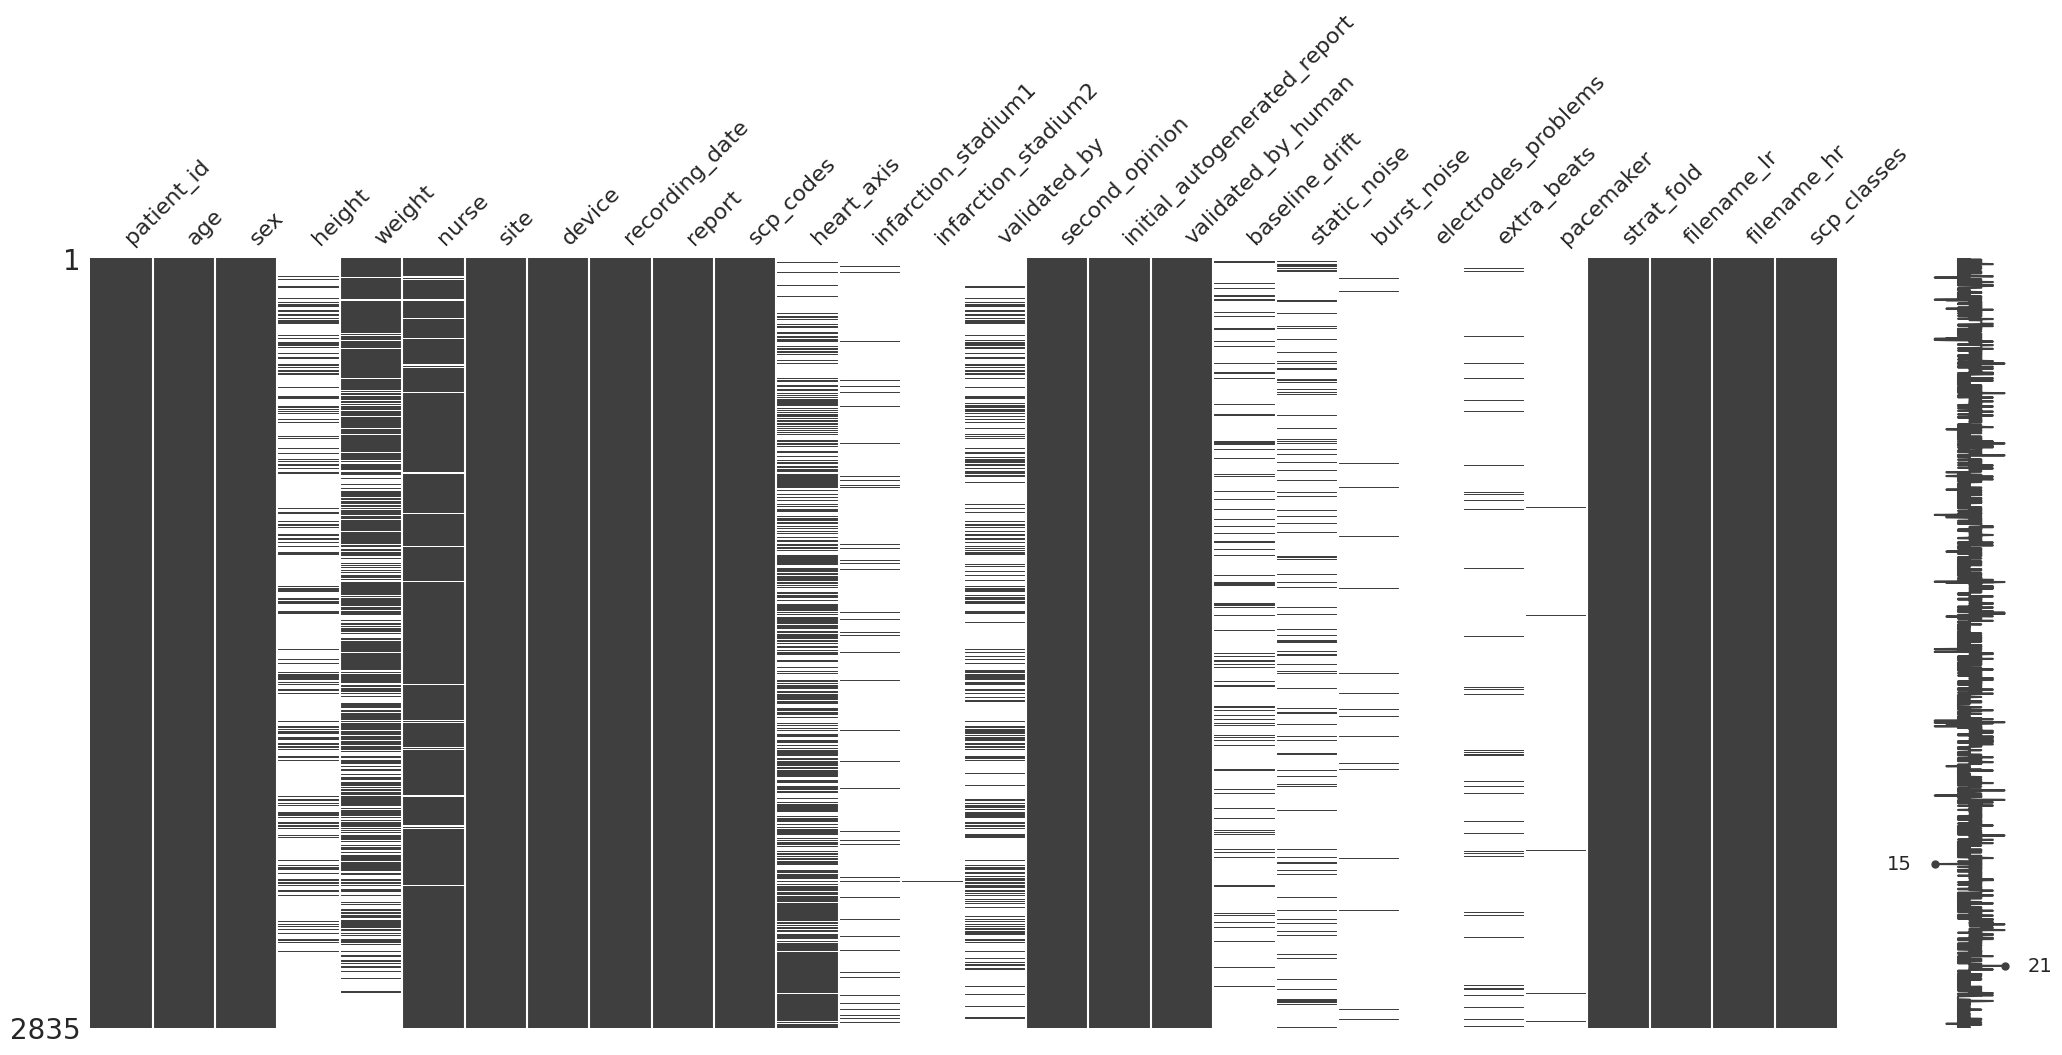

In [ ]:
import missingno as msno

msno.matrix(ECG_df)
plt.show()

In [ ]:
ECG_df[[col for col in ECG_df.columns if col not in ('scp_codes', 'scp_classes')]].nunique(dropna=True)

,0
patient_id,2596
age,30
sex,2
height,52
weight,90
nurse,12
site,31
device,11
recording_date,2834
report,792


In [ ]:
X = pd.DataFrame(index=ECG_df.index)

X['age'] = ECG_df.age
X.age.fillna(0, inplace=True)

X['sex'] = ECG_df.sex.astype(float)
X.sex.fillna(0, inplace=True)

X['height'] = ECG_df.height
X.loc[X.height < 50, 'height'] = np.nan
X.height.fillna(0, inplace=True)

X['weight'] = ECG_df.weight
X.weight.fillna(0, inplace=True)

X['infarction_stadium1'] = ECG_df.infarction_stadium1.replace({
    'unknown': 0,
    'Stadium I': 1,
    'Stadium I-II': 2,
    'Stadium II': 3,
    'Stadium II-III': 4,
    'Stadium III': 5
}).fillna(0)

X['infarction_stadium2'] = ECG_df.infarction_stadium2.replace({
    'unknown': 0,
    'Stadium I': 1,
    'Stadium II': 2,
    'Stadium III': 3
}).fillna(0)

X['pacemaker'] = (ECG_df.pacemaker == 'ja, pacemaker').astype(float)

X

<ipython-input-29-494dc8d5c6e4>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X.age.fillna(0, inplace=True)
<ipython-input-29-494dc8d5c6e4>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: 

,age,sex,height,weight,infarction_stadium1,infarction_stadium2,pacemaker
0,19.0,0.0,0.0,70.0,0.0,0.0,0.0
1,37.0,1.0,0.0,69.0,0.0,0.0,0.0
2,24.0,0.0,0.0,82.0,0.0,0.0,0.0
3,19.0,1.0,0.0,70.0,0.0,0.0,0.0
4,18.0,1.0,0.0,58.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
2830,37.0,1.0,0.0,0.0,0.0,0.0,0.0
2831,28.0,0.0,0.0,0.0,0.0,0.0,0.0
2832,22.0,1.0,0.0,0.0,0.0,0.0,0.0
2833,35.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
Z = pd.DataFrame(0, index=ECG_df.index, columns=['NORM', 'MI', 'STTC', 'CD', 'HYP'], dtype='int')
for i in Z.index:
    for k in ECG_df.loc[i].scp_classes:
        Z.loc[i, k] = 1

Z

,NORM,MI,STTC,CD,HYP
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
2830,1,0,0,0,0
2831,1,0,0,0,0
2832,0,0,1,0,0
2833,0,0,1,0,0


In [ ]:
X_train, Y_train, Z_train = X[ECG_df.strat_fold <= 8],  ECG_data[X[ECG_df.strat_fold <= 8].index - 1],  Z[ECG_df.strat_fold <= 8]
X_valid, Y_valid, Z_valid = X[ECG_df.strat_fold == 9],  ECG_data[X[ECG_df.strat_fold == 9].index - 1],  Z[ECG_df.strat_fold == 9]
X_test,  Y_test,  Z_test  = X[ECG_df.strat_fold == 10], ECG_data[X[ECG_df.strat_fold == 10].index - 1], Z[ECG_df.strat_fold == 10]

print(X_train.shape, Y_train.shape, Z_train.shape)
print(X_valid.shape, Y_valid.shape, Z_valid.shape)
print(X_test.shape,  Y_test.shape,  Z_test.shape)

(2268, 7) (2268, 1000, 12) (2268, 5)
(284, 7) (284, 1000, 12) (284, 5)
(283, 7) (283, 1000, 12) (283, 5)


# train

In [ ]:
from torch.utils.data import DataLoader, Dataset
import torch
from torchvision.transforms import Compose, ToPILImage, Resize, ToTensor

class ECGDataset(Dataset):
    def __init__(self, X_data, Y_data, Z_data, transform=None):
        self.X_data = X_data
        self.Y_data = Y_data
        self.Z_data = Z_data
        self.transform = transform

    def __len__(self):
        return len(self.Y_data)

    def __getitem__(self, idx):
        ecg_signal = self.Y_data[idx]
        ecg_image = self._convert_to_image(ecg_signal)
        label = self.Z_data.iloc[idx].values
        features = self.X_data.iloc[idx].values

        if self.transform:
            ecg_image = self.transform(ecg_image)

        return ecg_image, features, torch.tensor(label, dtype=torch.float32)

    def _convert_to_image(self, ecg_signal):
        from scipy.signal import spectrogram
        f, t, Sxx = spectrogram(ecg_signal[:, 0], fs=100)
        return torch.tensor(Sxx, dtype=torch.float32)

# 데이터 변환 및 데이터셋 생성
transform = Compose([
    ToPILImage(),
    Resize((224, 224)),
    ToTensor()
])

train_dataset = ECGDataset(X_train, Y_train, Z_train, transform=transform)
valid_dataset = ECGDataset(X_valid, Y_valid, Z_valid, transform=transform)
test_dataset = ECGDataset(X_test, Y_test, Z_test, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [ ]:
# 첫 번째 배치 확인
data_iter = iter(train_loader)
ecg_image, features, labels = next(data_iter)

# 배치의 형태 확인
print(f"ECG Image batch shape: {ecg_image.shape}")
print(f"Features batch shape: {features.shape}")
print(f"Labels batch shape: {labels.shape}")

ECG Image batch shape: torch.Size([32, 1, 224, 224])
Features batch shape: torch.Size([32, 7])
Labels batch shape: torch.Size([32, 5])


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.models import efficientnet_v2_s
from tqdm import tqdm
import matplotlib.pyplot as plt

# 1. 모델 정의
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# EfficientNet V2 모델 불러오기
model = efficientnet_v2_s(pretrained=True)
model.features[0][0] = nn.Conv2d(1, 24, kernel_size=3, stride=2, padding=1, bias=False)  # 1채널 입력
model.classifier[1] = nn.Linear(model.classifier[1].in_features, Z_train.shape[1])  # 출력 클래스 수 수정
model = model.to(device)

# 2. 손실 함수 및 옵티마이저 정의
criterion = nn.BCEWithLogitsLoss()  # 다중 클래스 이진 분류
optimizer = optim.Adam(model.parameters(), lr=1e-4)

In [ ]:
# 3. 훈련 루프
num_epochs = 50
train_losses = []
valid_losses = []
train_accuracies = []
valid_accuracies = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    print(f"Epoch {epoch+1}/{num_epochs}")
    for ecg_image, features, labels in tqdm(train_loader, desc="Training"):
        ecg_image = ecg_image.to(device)  # (batch_size, 1, H, W)
        labels = labels.to(device).float()  # 각 클래스에 대해 이진 레이블

        optimizer.zero_grad()
        outputs = model(ecg_image)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # 정확도 계산 (threshold=0.5)
        preds = (torch.sigmoid(outputs) > 0.5).float()
        correct_train += (preds == labels).sum().item()
        total_train += labels.numel()

    train_losses.append(running_loss / len(train_loader))
    train_accuracies.append(correct_train / total_train * 100)

    # Validation 단계
    model.eval()
    valid_loss = 0.0
    correct_valid = 0
    total_valid = 0
    with torch.no_grad():
        for ecg_image, features, labels in tqdm(valid_loader, desc="Validation"):
            ecg_image = ecg_image.to(device)
            labels = labels.to(device).float()

            outputs = model(ecg_image)
            loss = criterion(outputs, labels)
            valid_loss += loss.item()

            # 정확도 계산 (threshold=0.5)
            preds = (torch.sigmoid(outputs) > 0.5).float()
            correct_valid += (preds == labels).sum().item()
            total_valid += labels.numel()

    valid_losses.append(valid_loss / len(valid_loader))
    valid_accuracies.append(correct_valid / total_valid * 100)

    print(f"Train Loss: {train_losses[-1]:.4f}, Train Accuracy: {train_accuracies[-1]:.2f}%")
    print(f"Valid Loss: {valid_losses[-1]:.4f}, Valid Accuracy: {valid_accuracies[-1]:.2f}%")

Epoch 1/10


Training:  21%|██        | 15/71 [05:11<19:21, 20.74s/it]


KeyboardInterrupt: 

In [ ]:
# 4. 학습 손실 및 정확도 그래프 그리기
plt.figure(figsize=(12, 6))

# Loss 그래프
plt.subplot(1, 2, 1)
plt.plot(train_losses, label="Train Loss")
plt.plot(valid_losses, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and Validation Loss")

# Accuracy 그래프
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label="Train Accuracy")
plt.plot(valid_accuracies, label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.title("Training and Validation Accuracy")

plt.tight_layout()
plt.show()

In [ ]:
# 5. 테스트 데이터 평가
model.eval()
test_loss = 0.0
correct = 0
total = 0

with torch.no_grad():
    for ecg_image, features, labels in tqdm(test_loader, desc="Testing"):
        ecg_image = ecg_image.to(device)
        labels = labels.to(device).float()

        outputs = model(ecg_image)
        test_loss += criterion(outputs, labels).item()

        # 정확도 계산 (threshold=0.5)
        preds = (torch.sigmoid(outputs) > 0.5).float()
        correct += (preds == labels).sum().item()
        total += labels.numel()

test_loss /= len(test_loader)
accuracy = correct / total * 100
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {accuracy:.2f}%")

# 6. 모델 저장
torch.save(model.state_dict(), "efficientnet_ecg_model.pth")
print("Model saved as efficientnet_ecg_model.pth")
